
    
**Заголовок:** аналитиз популярного сервиса аренды самокатов

**Описание проекта**. Есть данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализировав данные и проверив некоторые гипотезы, можем понять как помочь вырасти бизнессу.


**Цель исследования**: Определить средний возраст, количество поездок для различных групп и посмотреть на их распределения и зависимости, обработка аномалий

**Ход исследования**:

1. Загрузка данных
2. Предобработка данных( Выявление дубликатов, приведение типов)
3. Исследовательский анализ ( Визуализация информации )
4. Объединение всех таблиц
5. Подсчет выручки
6. Проверка гипотез


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
users= pd.read_csv('/datasets/users_go.csv') # df данных пользователя

In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides= pd.read_csv('/datasets/rides_go.csv') # df с логами поездок

In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
subs= pd.read_csv('/datasets/subscriptions_go.csv')# условия подписки

In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Вывод: Изучив все три таблицы можно увидеть, что среди 18068 строк в rides и 1565 строк в users нет ни одного пропуска, однако нужно поменять тип данных в столбце date таблицы rides

#### Шаг 2. Предобработка данных

*Приведем столбец date к типу datetime64*:

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [11]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


*Добавим столбец date_month с номером месяца из date*

In [12]:
rides['date_month'] =  pd.DatetimeIndex(rides['date']).month

*Проверим наши датафреймы rides и users на пропуски:*

In [13]:
rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [14]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

в датафрейме нет пропущенных значений

In [15]:
rides.duplicated().sum()

0

In [16]:
users.duplicated().sum()

31

In [17]:
users.drop_duplicates().reset_index()

,index,user_id,name,age,city,subscription_type
0,0,1,Кира,22,Тюмень,ultra
1,1,2,Станислав,31,Омск,ultra
2,2,3,Алексей,20,Москва,ultra
3,3,4,Константин,26,Ростов-на-Дону,ultra
4,4,5,Адель,28,Омск,ultra
...,...,...,...,...,...,...
1529,1529,1530,Ростислав,29,Сочи,free
1530,1530,1531,Никита,25,Пятигорск,free
1531,1531,1532,Алексей,26,Тюмень,free
1532,1532,1533,Степан,22,Краснодар,free


В таблице users получилось 31 явных дубликата

In [18]:

users.duplicated().sum()

31

In [19]:
users = users.drop_duplicates().reset_index()

In [20]:

users.duplicated().sum()

0

В предобработке данных мы сменили необходимый тип данных date, добавили столбец с месяцем и удалили дубликаты с таблицы  users

#### Шаг 3. Исследовательский анализ данных

3.1 

*Узнаем о пользователях с разных городов*

In [21]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0, 0.5, 'Количество пользователей')

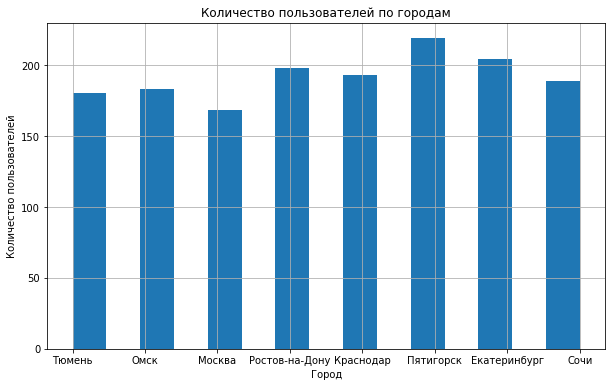

In [22]:
users['city'].hist(figsize=(10,6),bins = 15)
plt.title('Количество пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')

In [23]:
print('Медианное кол-во пользователей в городах - ', users['city'].value_counts().median())
print('Среднее арифм. кол-во пользователей в городах - ', users['city'].value_counts().mean())

Медианное кол-во пользователей в городах -  191.0
Среднее арифм. кол-во пользователей в городах -  191.75


После изучения значений и визуализации графиков, можно понять, что среднее количество пользователей в городах около 195.

Наименьшее кол-во пользователей в Москве - 172, наибольшее в Пятигорске - 226

3.2

*Изучим соотношение пользователей с подпиской и без нее*

In [24]:
users.query('subscription_type == "ultra"').count()['age']/users.count()['age'] 

0.4556714471968709

Text(0, 0.5, '')

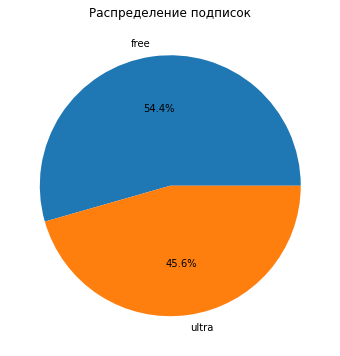

In [25]:
users['subscription_type'].value_counts().plot(kind = 'pie', autopct='%.1f%%', figsize=(10,6))
plt.title('Распределение подписок')
plt.ylabel('')

Отношение пользователей с подпиской на общее кол-во пользователей ~ 0.46 или 46%


3.3

*Изучим возраст пользователей*

Text(0, 0.5, 'Количество пользователей')

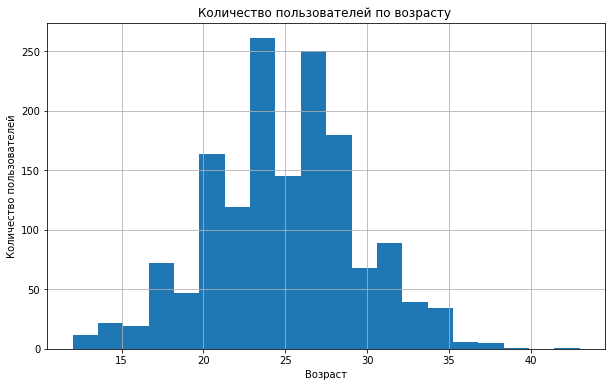

In [26]:
users['age'].hist(figsize=(10,6),bins=20)
plt.title('Количество пользователей по возрасту ')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

На общей гистограмме видно примерное распрделение пользователей, теперь "приблизим" ее в диапозон от 20 до 30, являющийся целевой группой

Text(0, 0.5, 'Количество пользователей')

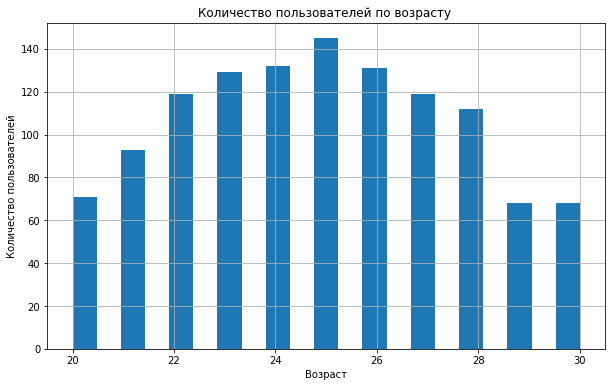

In [27]:
users['age'].hist(figsize=(10,6),bins=21,range=(20,30))
plt.title('Количество пользователей по возрасту ')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

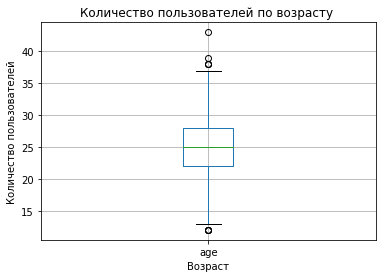

In [28]:
users.boxplot('age')
plt.title('Количество пользователей по возрасту ')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

In [29]:
print('1 квартиль',np.quantile(users['age'], 0.25))
print('1 квартиль',np.quantile(users['age'], 0.5))
print('3 квартиль',np.quantile(users['age'], 0.75))

1 квартиль 22.0
1 квартиль 25.0
3 квартиль 28.0


по второй гистограмме и боксплоту видно, что основная масса пользователей находится в возрасте от 22 до 28 лет

3.4

*Изучим дистанцию за поездку*

Text(0, 0.5, 'Количество поездок')

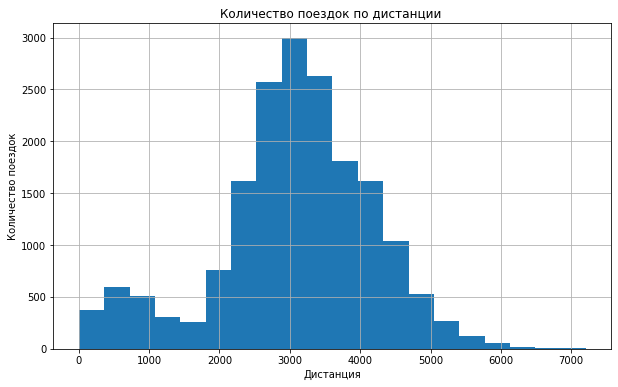

In [30]:
rides['distance'].hist(figsize=(10,6),bins=20)
plt.title('Количество поездок по дистанции ')
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

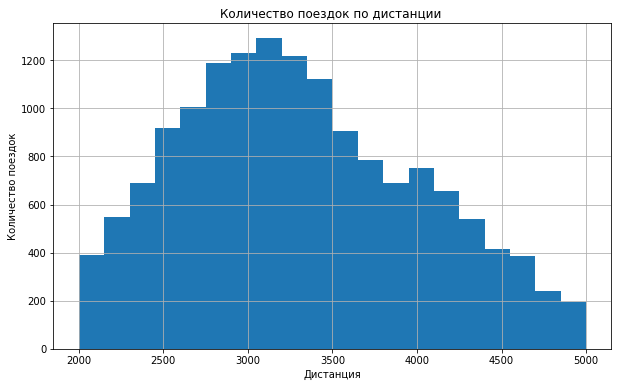

In [31]:
rides['distance'].hist(figsize=(10,6),bins=20,range=(2000,5000))

plt.title('Количество поездок по дистанции ')
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')

По гистрограмме видно, что основная часть пользователей едет от 2500 до 4000 метров за поездку, но существует подгруппа поездок до 1000 метров, когда самокат берут на пару минут

3.5

*Изучим длительность поездки*

Text(0, 0.5, 'Количество поездок')

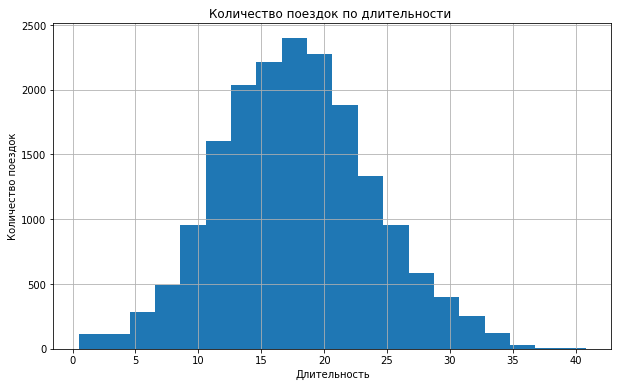

In [32]:
rides['duration'].hist(figsize=(10,6),bins=20)
plt.title('Количество поездок по длительности ')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')

график длительности поездки похож на нормальное распределение с средним значением около 17

#### Шаг 4. Объединение данных

4.1*объеденим датафреймы users и rides, subs в rides_detail*

In [33]:
rides_detail = rides.merge(users, on='user_id')

In [34]:
rides_detail = rides_detail.merge(subs, on ='subscription_type')

In [35]:
rides_detail.head()

,user_id,distance,duration,date,date_month,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,0,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,0,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,0,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,0,Кира,22,Тюмень,ultra,6,0,199


In [36]:
rides_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int64         
 5   index              18068 non-null  int64         
 6   name               18068 non-null  object        
 7   age                18068 non-null  int64         
 8   city               18068 non-null  object        
 9   subscription_type  18068 non-null  object        
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [37]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [38]:
rides_detail.duplicated().sum()

0

In [39]:
rides_detail = rides_detail.drop_duplicates().reset_index()

в объедененной таблице появились дубликаты, удалим их

In [40]:
rides_detail.isna().sum()

level_0              0
user_id              0
distance             0
duration             0
date                 0
date_month           0
index                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

в объедененной таблице отсутствуют пропуски

4.2*создадим датафрейм users_unsub и users_sub для пользователей без подписки и с подпиской соответственно*

In [41]:
users_unsub = rides_detail.loc[rides_detail['subscription_type'] == 'free']

In [42]:
users_sub = rides_detail.loc[rides_detail['subscription_type'] == 'ultra']

4.3*Визуализируем значения расстояния и длительности поездок для users_unsub и users_sub*

Text(0, 0.5, 'Количество поездок')

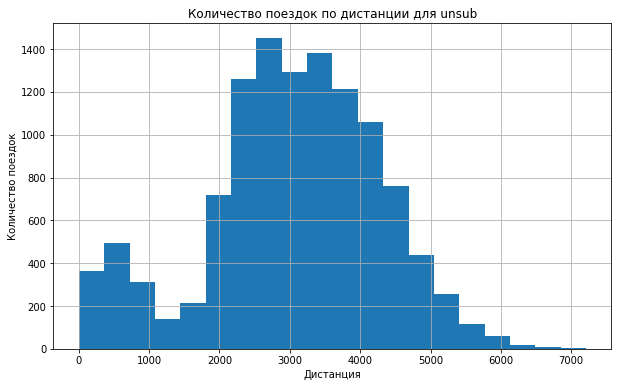

In [43]:
users_unsub['distance'].hist(figsize=(10,6),bins=20)
plt.title('Количество поездок по дистанции для unsub')
plt.xlabel('Дистанция')
plt.ylabel('Количество поездок')

In [44]:
print('1 квартиль',np.quantile(users_unsub['distance'], 0.25))
print('1 квартиль',np.quantile(users_unsub['distance'], 0.5))
print('3 квартиль',np.quantile(users_unsub['distance'], 0.75))

1 квартиль 2366.5626893101276
1 квартиль 3114.648464847295
3 квартиль 3905.6978940544814


Text(0, 0.5, 'Количество поездок')

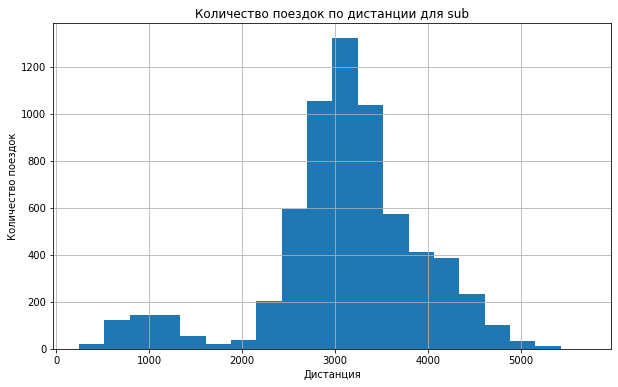

In [45]:
users_sub['distance'].hist(figsize=(10,6),bins=20)
plt.title('Количество поездок по дистанции для sub')
plt.xlabel('Дистанция') 
plt.ylabel('Количество поездок')

In [46]:
print('1 квартиль',np.quantile(users_sub['distance'], 0.25))
print('1 квартиль',np.quantile(users_sub['distance'], 0.5))
print('3 квартиль',np.quantile(users_sub['distance'], 0.75))

1 квартиль 2785.4440169631416
1 квартиль 3148.6372291760854
3 квартиль 3560.574424951713


Несмотря на то, что медианное значение дистанции в обеих группах практически одинаково, стоит отметить, что 1 и 3 квартили в обеих группах существенно отличаются.  

1 квартиль больше среди пользователей с подпиской, а 3 квартиль больше у людей без подписок

Text(0, 0.5, 'Количество поездок')

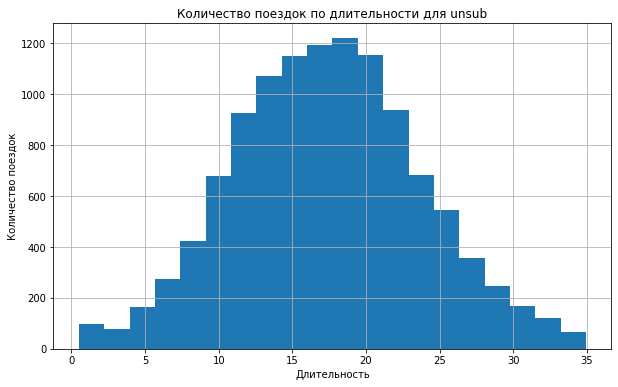

In [47]:
users_unsub['duration'].hist(figsize=(10,6),bins=20)
plt.title('Количество поездок по длительности для unsub')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')

In [48]:
print('1 квартиль',np.quantile(users_unsub['duration'], 0.25))
print('1 квартиль',np.quantile(users_unsub['duration'], 0.5))
print('3 квартиль',np.quantile(users_unsub['duration'], 0.75))

1 квартиль 12.958436576931698
1 квартиль 17.326890226082043
3 квартиль 21.594070634390352


Text(0, 0.5, 'Количество поездок')

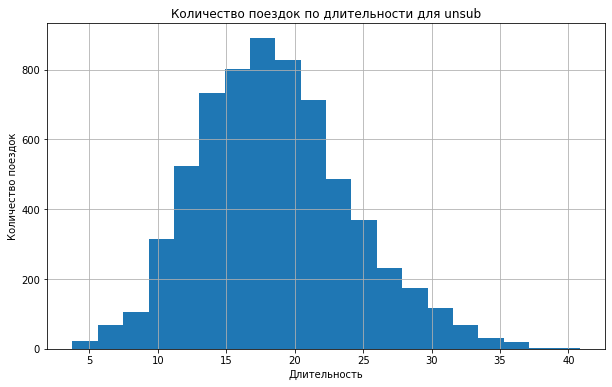

In [49]:
users_sub['duration'].hist(figsize=(10,6),bins=20)
plt.title('Количество поездок по длительности для unsub')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')

In [50]:
print('1 квартиль',np.quantile(users_sub['duration'], 0.25))
print('1 квартиль',np.quantile(users_sub['duration'], 0.5))
print('3 квартиль',np.quantile(users_sub['duration'], 0.75))

1 квартиль 14.524653911131882
1 квартиль 18.17815320055055
3 квартиль 21.884128697712004


В двух группах значение 3 квартиля примерно равно. Однаков у пользователей с подпиской 1 и 3 квартиль сдвинут в большую сторону

In [51]:
rides_detail

,level_0,user_id,distance,duration,date,date_month,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,1,4409.919140,25.599769,2021-01-01,1,0,Кира,22,Тюмень,ultra,6,0,199
1,1,1,2617.592153,15.816871,2021-01-18,1,0,Кира,22,Тюмень,ultra,6,0,199
2,2,1,754.159807,6.232113,2021-04-20,4,0,Кира,22,Тюмень,ultra,6,0,199
3,3,1,2694.783254,18.511000,2021-08-11,8,0,Кира,22,Тюмень,ultra,6,0,199
4,4,1,4028.687306,26.265803,2021-08-28,8,0,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,18063,1534,3781.098080,19.822962,2021-11-04,11,1533,Альберт,25,Краснодар,free,8,50,0
18064,18064,1534,2840.423057,21.409799,2021-11-16,11,1533,Альберт,25,Краснодар,free,8,50,0
18065,18065,1534,3826.185507,18.435051,2021-11-18,11,1533,Альберт,25,Краснодар,free,8,50,0
18066,18066,1534,2902.308661,16.674362,2021-11-27,11,1533,Альберт,25,Краснодар,free,8,50,0


сравнивая две категории можно отметить, что у неподписчиков:

1)большой диапазон значений дистанции поездок в основном от 2366 до 3903 метров

2)большой диапазон значений продолжительности поездок в основном от 12.9 до 21.5 минут


у подписчиков:

1)диапазон дистанции меньше(основная часть от 2785 до 3559 метров)

2)диапазон длительности поездок меньше(основная часть от 14.4  до 21.8 минут)

#### Шаг 5. Подсчёт выручки

In [52]:
rides_detail['duration'] = np.ceil(rides_detail['duration'])

In [53]:
ride_counts = rides_detail.groupby(['user_id', 'date_month', 'subscription_type']).size().reset_index(name='ride_count')

In [54]:
profit = rides_detail.groupby(['user_id', 'date_month', 'subscription_type','minute_price','start_ride_price','subscription_fee']).agg(
    total_distance=('distance', 'sum'),  # сумма дистанций
    total_duration=('duration', 'sum')    # сумма длительностей
).reset_index()


In [55]:
profit = profit.merge( ride_counts, on=['user_id', 'date_month', 'subscription_type'])

In [56]:
def price_total(row):
    a=0
    sub_price = row['subscription_fee']
    start_price = row['start_ride_price']
    minute_price = row['minute_price']
    minutes = row['total_duration']
    sub_type = row['subscription_type']
    ride_cnt = row['ride_count']
    
    a = sub_price + (start_price*ride_cnt)+ (minute_price*minutes)
    return a 


In [57]:
profit['total'] = profit.apply(price_total, axis = 1)

In [58]:
profit

,user_id,date_month,subscription_type,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,ride_count,total
0,1,1,ultra,6,0,199,7027.511294,42.0,2,451.0
1,1,4,ultra,6,0,199,754.159807,7.0,1,241.0
2,1,8,ultra,6,0,199,6723.470560,46.0,2,475.0
3,1,10,ultra,6,0,199,5809.911100,32.0,2,391.0
4,1,11,ultra,6,0,199,7003.499363,56.0,3,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,26.0,2,308.0
11327,1534,8,free,8,50,0,7622.453034,48.0,2,484.0
11328,1534,9,free,8,50,0,4928.173852,23.0,1,234.0
11329,1534,11,free,8,50,0,13350.015305,78.0,4,824.0


#### Шаг 6. Проверка гипотез

In [59]:
from scipy import stats as st

6.1*Проверим гипотезу о "выгодности" пользователей с подпиской*

Сформулируем гипотезы о "выгодности" пользователей с подпиской.

Нулевая гипотеза (H₀): среднее время поездки у подписчиков не больше, чем у пользователей без подписки.

Альтернативная гипотеза (H₁): среднее время поездки у подписчиков больше.

In [60]:
users_sub_duration = users_sub['duration']

In [61]:
users_unsub_duration = users_unsub['duration']

In [62]:
print(f'среднее значение продолжительности с подпиской {np.mean(users_sub_duration)}')
print(f'среднее значение продолжительности без подписки {np.mean(users_unsub_duration)}')

среднее значение продолжительности с подпиской 18.54198516280583
среднее значение продолжительности без подписки 17.39090929866399


In [63]:
res_duration = st.ttest_ind(
users_sub_duration,
users_unsub_duration,
alternative = 'greater',
equal_var = False
)
print('значение p-value', res_duration.pvalue,'\n')

p =0.05

if res_duration.pvalue< p:
    print('отвергаем нулевую гипотезу')
else:
    print('не отвергаем нулевую гипотезу')



значение p-value 5.6757813771289775e-37 

отвергаем нулевую гипотезу


Действительно, можно утверждать о том, что пользователи с подпиской имеют более долгие поездки

6.2*Проверим гипотезу о не превышении 3130 метров за поездку у пользователей с подпиской*  

Нулевая гипотеза - пользователи проезжают около 3130 метров за поездку с подпиской

Альтернативная гипотеза - дистанция превышает 3130 метров

In [64]:
users_sub_distance = users_sub['distance']

In [65]:
print(f'среднее значение дистанции с подпиской {np.mean(users_sub_distance)}')

среднее значение дистанции с подпиской 3115.4453880370247


In [66]:
value = 3130 

In [67]:
res_distance = st.ttest_1samp(
users_sub_distance, value, alternative='greater'
    
)
print('значение p-value', res_distance.pvalue,'\n')

p=0.05

if res_distance.pvalue< p:
    print('отвергаем нулевую гипотезу')
else:
    print('не отвергаем нулевую гипотезу')


значение p-value 0.9195368847849785 

не отвергаем нулевую гипотезу


Можно утверждать, что в среднем поездки у пользователей с подпиской около 3130 метров

6.3*Проверим гипотезу о том будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки*  

Нулевая гипотеза - выручки с подписчиков и неподписчиков равны

Альтернативная гипотеза - выручка с пользователей с подпиской выше 

добавим в датафрейм df_profit стобец с помесячной выручкой

In [68]:
users_sub_permonth = profit.loc[profit['subscription_type'] == 'ultra','total']

In [69]:
users_unsub_permonth = profit.loc[profit['subscription_type'] == 'free','total']

In [70]:
print(f'среднее значение выручки в месяц с подпиской {np.mean(users_sub_permonth)}')
print(f'среднее значение выручки в месяц без подписки {np.mean(users_unsub_permonth)}')

среднее значение выручки в месяц с подпиской 362.7921906022502
среднее значение выручки в месяц без подписки 328.6413651073845


In [71]:
res_duration = st.ttest_ind(
users_sub_permonth,
users_unsub_permonth,
alternative = 'greater',
equal_var = False
)
print('значение p-value', res_duration.pvalue,'\n')

p =0.05

if res_duration.pvalue < p :
    print('отвергаем нулевую гипотезу')
else:
    print('не отвергаем нулевую гипотезу')



значение p-value 8.874140893976874e-40 

отвергаем нулевую гипотезу


Можно утверждать, что выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

6.4

Нам понадобиться использовать st.ttest_rel(), т.к выборки зависимые и состоят из тех же пользователей до и после внедрения новых серверов

Общий вывод:

На основе исследования сервиса аренды самокатов GoFast можно обозначить ключевые шаги:

1) в таблице с пользователями хранились дубликаты в количестве **31**(значения полученные по ошибке)

2) по итогам исследовательского анализа узнали процент пользователей с подпиской - **46%**, средний возраст пользователей - **25**, город с наибольшим количеством пользователей - Пятигорск(**226**), наименьшим - Москва(**172**). Из этого следует сделать вывод о том, что нужно выделять больше денег на продвижение сервиса в столице и увеличивать свою долю рынка там  

3)  Распределения расстояний и времени поездок показали, что пользователи без подписки совершают более разнородные поездки: у них больше коротких и экстремально длинных поездок**(в основном от 2366 до 3905 метров для дистанции и и от 12.9 до 21.5 минут для длительности поездки)**. У подписчиков поведение более стабильное и предсказуемое, что может упростить планирование ресурсов и персонализированных предложений**(для дистанции 2785 и 3560 метров и  14.5 до 21.8 минут времени поездки)**. 

4) Была создана таблица, группирующая клиентов по месяцам и функция которая считает в этой таблице месячную выручку. С помощью этой таблицы стало намного удобнее видеть динамику и сравнивать доходы, группируя данные по месяцам.

5) На основне выдвинутых гипотез и работы с распределением можно сделать выводы о том:

    5.1) Выдвинув нулевую гипотезу о том, что среднее время поездки у подписчиков не больше, чем у пользователей без подписки мы не смогли опровергнуть ее, что дает нам полагать то, что время поездки у подписчиков больше
    
    5.2)Выдвинув гипотезу о том, что в среднем поездки у пользователей с подпиской не более 3130 метров был проведен t-тест на основне которого можно утверждать о том, что пользователи проезжать около 3130 метров 
    
    5.3) выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
    
6) На основне различных исследований можно сделать вывод о том, что пользователи с подпиской ultra более стабильны и предсказуемы, а также приносят больше прибыли, чем пользователи без подписки. 

7) Сейчас уровень подписчиков равен 46 процентам, следует предложить пользователям без подписки пробную версию для привлечения потенциальных подписчиков